## Functional maps playground

In [10]:
import torch
import numpy as np
from ccmm.matching.utils import perm_indices_to_perm_matrix
from ccmm.matching.func_maps import compute_eigenvectors
from ccmm.matching.func_maps import fit_func_map
import matplotlib.pyplot as plt

from ccmm.matching.func_maps import FM_to_p2p, graph_zoomout_refine

## Hyperparameters

In [11]:
k1 = 20
k2 = 20
num_neighbors = 5

InitFM_mode = "identity"
w_descrs = 0.5
w_laps = 100
w_dcomms = 10

num_zoomout_iters = 20
step = 2
opt_descriptor_type = "weights"  # "weights", "features", "features_denoised", "eigenneurons", "spectral"
mode = "connectivity"  # connectivity, distance

### Randomly permute a random matrix and obtain the permutation via functional maps

In [12]:
# num_neurons = 30, each 4-dimensional
n = 30
d = 10

X = torch.rand(n * d).reshape(n, d).float().numpy()
P_YX = torch.randperm(n).numpy()
Y = X[P_YX]
print(P_YX)

# P maps from X to Y
P_YX = perm_indices_to_perm_matrix(torch.tensor(P_YX)).numpy()

[21  9 17  1 16 10  3 20  7 28 29  6 24 23 25 22  5 26 13 15 14 27 11  0
 19  8 18  4  2 12]


In [13]:
Xevecs, Yevecs, Xevals, Yevals = compute_eigenvectors(
    X, Y, radius=None, num_neighbors=num_neighbors, mode=mode, normalize_lap=True
)

FM_opt, opt_linsolve = fit_func_map(
    X, Y, Xevecs, Yevecs, Xevals, Yevals, k1, k2, InitFM_mode, w_descrs, w_lap=0.5, w_dcomm=0.5, method="optimize"
)

C_gt = Yevecs.T @ P_YX @ Xevecs

Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 770
         Function evaluations: 1528
         Gradient evaluations: 1528


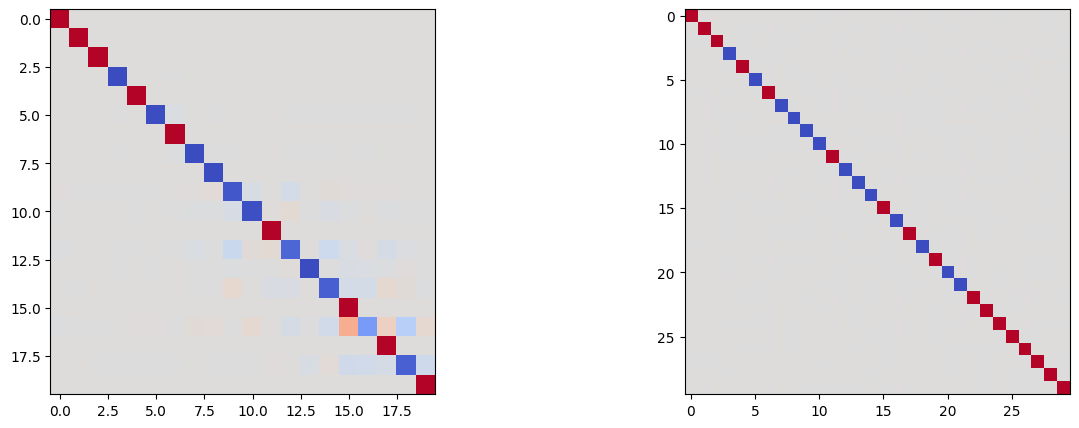

In [14]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.imshow(FM_opt, cmap="coolwarm")

plt.subplot(1, 2, 2)
plt.imshow(C_gt, cmap="coolwarm")

plt.show()

In [18]:
FM_opt_zo = graph_zoomout_refine(FM_opt, Xevecs, Yevecs, num_iters=10, step=1)

perm_opt_zo = FM_to_p2p(FM_opt_zo, Xevecs, Yevecs, n_jobs=1)

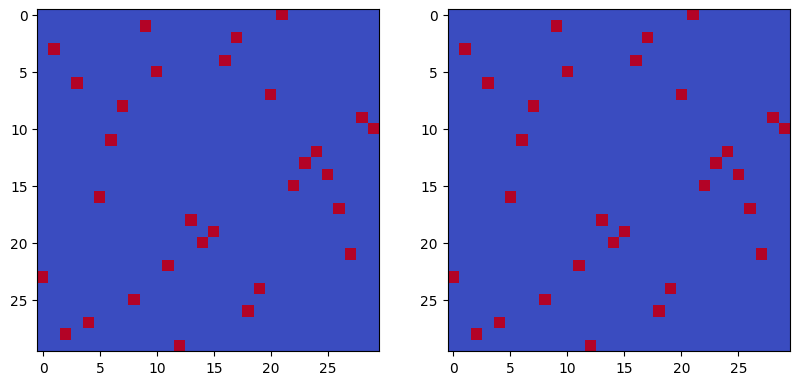

In [19]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)

plt.imshow(perm_opt_zo, cmap="coolwarm")

plt.subplot(1, 3, 2)
plt.imshow(P_YX, cmap="coolwarm")